## Importing Libraries


In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from functools import reduce
from scipy import signal, interpolate
from scipy.stats import entropy
import scipy.stats as stats
from scipy.fft import fft, ifft

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv("EEG_Eye_State_Classification.csv")

## Exploring Dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [4]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [5]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

No Null Values Found

## Create a Plotting function

In [6]:
def plot_eeg_data(data_list,time_vector, x_limits=[0, 30]):
    plt.figure(figsize=(15, 15) )
    for ind_data, data in enumerate(data_list):
        if ind_data == len(data_list) - 1:
            for ind, col in enumerate(data.columns.tolist()):
                plt.plot(time_vector, 5 * ind + stats.zscore(data[col], nan_policy='omit'), linewidth=0.5, label=col)
            plt.legend(ncol=6)
        else:
            for ind, col in enumerate(data.columns.tolist()):
                plt.plot(time_vector, 5 * ind + stats.zscore(data[col], nan_policy='omit'), linewidth=0.3, alpha=0.8, color='b', label="")
    plt.xlim(x_limits)

## Split Features & Targets

In [7]:
data = df.copy()
y= data.pop('eyeDetection')
x= data

## Visualization

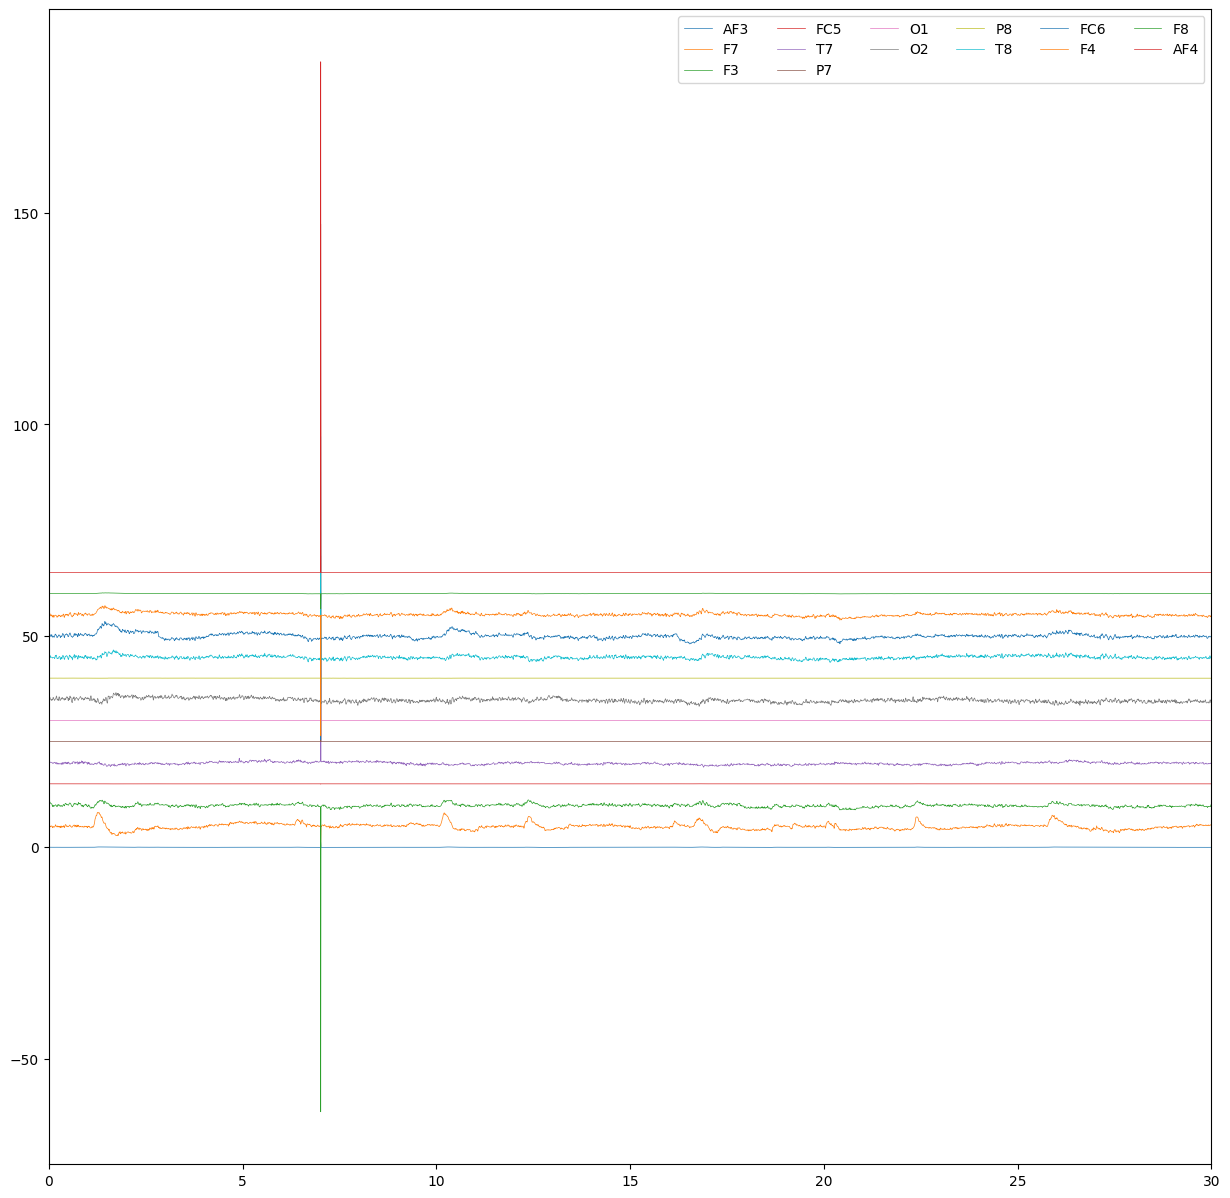

In [8]:
Fs = 128 # Hz
time_vector =  np.arange(0, len(df) * 1 / Fs, 1/Fs)
# x = x.apply(stats.zscore, axis=0)
# x = x.applymap(lambda x: np.nan if (abs(x) > 4) else x )
# x = x.apply(stats.zscore, nan_policy='omit', axis=0)
# x = x.applymap(lambda x: np.nan if (abs(x) > 4) else x )
plot_eeg_data([x] ,time_vector)

## Standardization

In [9]:
x_new = StandardScaler().fit_transform(x)

In [10]:
x_new = pd.DataFrame(x_new) 
x_new.columns = x.columns

----

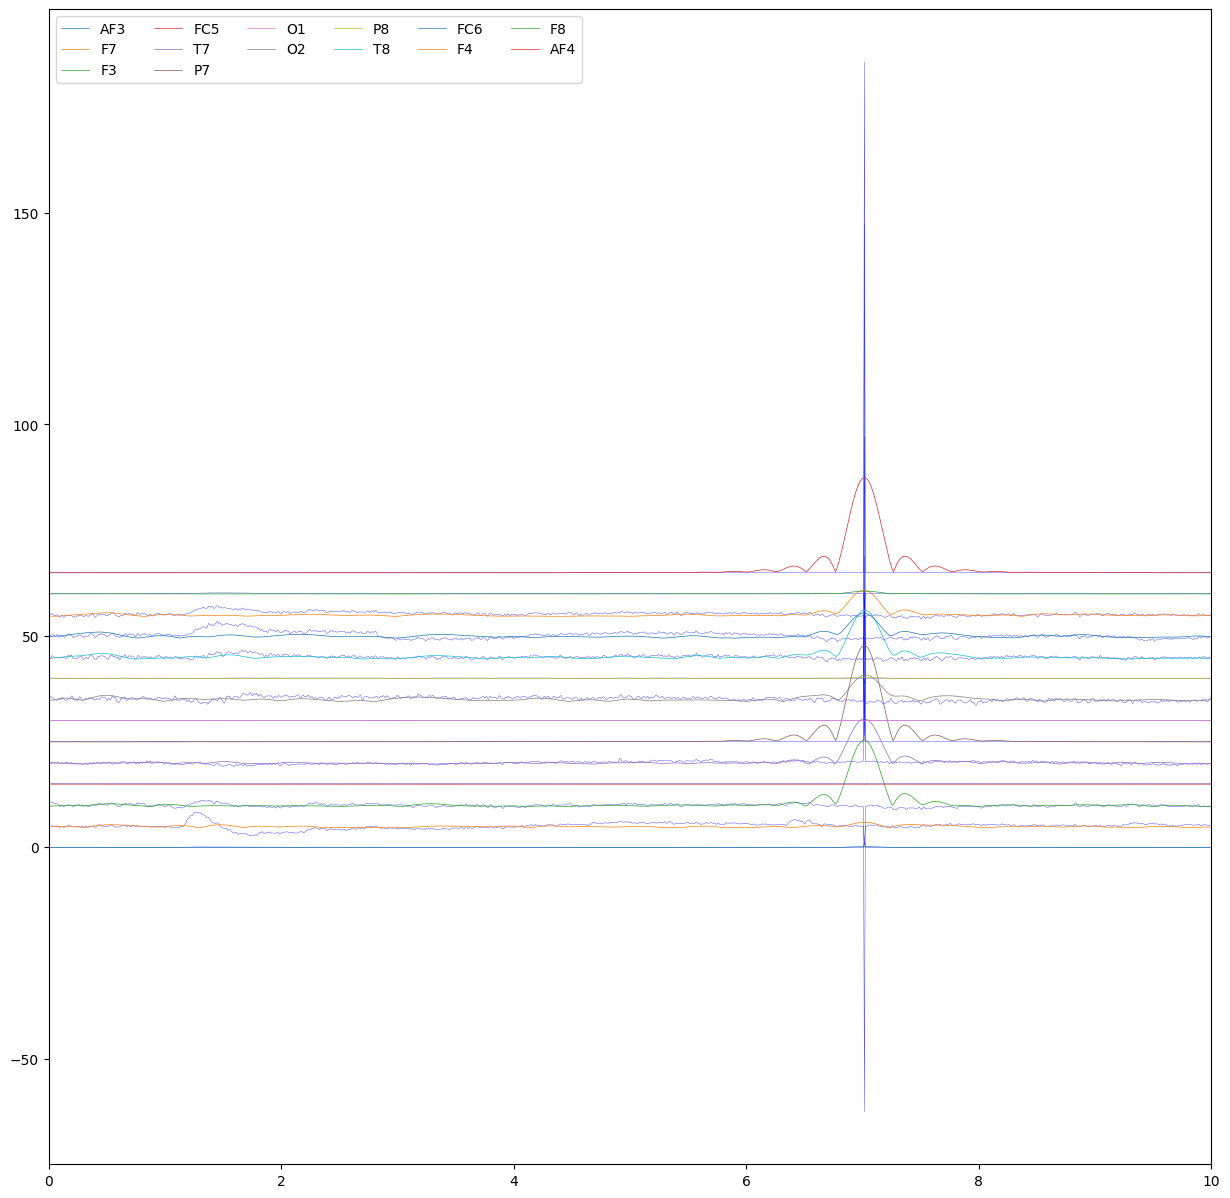

In [11]:
b, a = signal.butter(6, [8 / Fs * 2, 12 / Fs * 2], btype='bandpass')
X_interp_clean_alpha = x_new.apply(lambda x: signal.filtfilt(b, a, x) / max(abs(signal.filtfilt(b, a, x))) * max(abs(x)), axis=0)
X_interp_clean_alpha = X_interp_clean_alpha.apply(lambda x: np.abs(signal.hilbert(x)), axis=0)
X_interp_clean_alpha.columns = x.columns
plot_eeg_data([x_new, X_interp_clean_alpha], time_vector, x_limits=[0, 10])

-----

## Dividing into Training and Validation sets

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X_interp_clean_alpha,y,test_size=0.2)

In [13]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((11984, 14), (2996, 14), (11984,), (2996,))

## Building Model 


since we have 14 features the model expect input sequences of length 14 with one feature per time step so we should reshape our data

In [14]:
x_train = np.array(x_train).reshape(-1,14,1)
x_test = np.array(x_test).reshape(-1,14,1)

1. An input layer with a shape of (14, 1), which implies that the model expects input sequences of length 14 with one feature per time step.
2. A Dense layer with 64 units and ReLU activation function. This layer takes the input sequences from the input layer. Additionally, it applies L2 kernel regularization, which helps prevent overfitting by adding a penalty term to the loss function based on the weights of the layer.
3. A Bidirectional LSTM1 layer with 256 units. Bidirectional LSTMs process input sequences in both forward and backward directions, which can capture dependencies in both directions. The return_sequences=True option means that it returns sequences rather than just the final hidden state.
4. A Dropout layer with a dropout rate of 0.3 to the output of the first LSTM layer (lstm_1). Dropout is a regularization technique that randomly drops a portion of the neurons' output during training to prevent overfitting. 
5. Similar to LSTM 1, a Bidirectional LSTM2 layer with 128 units and return_sequences=True. It processes the output of Dropout layer 1.
6. Another Dropout layer with a dropout rate of 0.3 is applied to the output of LSTM 2
7. The Flatten layer converts the output from LSTM 2 into a 1D vector. This is often done when transitioning from recurrent layers to fully connected layers.
8. A Dense layer with 128 units and a ReLU activation function to process the flattened output. This layer to capture complex patterns in the data.
9. The final Dense layer has a single unit and uses a sigmoid activation function. This is commonly used for binary classification tasks as ours


In [15]:
input_layer = tf.keras.Input(shape=(14,1))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(input_layer)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.2)(lstm_1)

lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.2)(lstm_3)

flat = Flatten()(drop2)

Dense_2 = Dense(128, activation = 'relu')(flat)
output_layer = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 1)]           0         
                                                                 
 dense (Dense)               (None, 14, 64)            128       
                                                                 
 bidirectional (Bidirection  (None, 14, 512)           657408    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 14, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 14, 256)           0     

----------------------

1. We will use Adam optimizer for weights updating on training the model
2. A learning rate scheduler callback that reduces the learning rate exponentially as training goes on. This is used to fine-tune the learning rate during training.
3. compile the Keras model, specifying the Adam optimizer, binary cross-entropy as the loss function (commonly used for binary classification), and accuracy as the metric to monitor during training.

In [16]:
def train_model(model,x_train, y_train,x_test,y_test,epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)
        earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
        mc = ModelCheckpoint( './_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
      

        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        training_history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[earlystop,mc,lr_schedule])
        return model,training_history

In [17]:
model,history = train_model(model, x_train, y_train,x_test, y_test, epoch = 100) 

Epoch 1/100
599/600 [============================>.] - ETA: 0s - loss: 0.6798 - accuracy: 0.5555
Epoch 1: val_accuracy improved from -inf to 0.57877, saving model to .\_best_model.h5
600/600 [==============================] - 44s 64ms/step - loss: 0.6797 - accuracy: 0.5556 - val_loss: 0.6614 - val_accuracy: 0.5788 - lr: 0.0010
Epoch 2/100
599/600 [============================>.] - ETA: 0s - loss: 0.6487 - accuracy: 0.5840
Epoch 2: val_accuracy improved from 0.57877 to 0.59780, saving model to .\_best_model.h5
600/600 [==============================] - 38s 64ms/step - loss: 0.6487 - accuracy: 0.5840 - val_loss: 0.6463 - val_accuracy: 0.5978 - lr: 9.0484e-04
Epoch 3/100
599/600 [============================>.] - ETA: 0s - loss: 0.6238 - accuracy: 0.6251
Epoch 3: val_accuracy improved from 0.59780 to 0.64586, saving model to .\_best_model.h5
600/600 [==============================] - 38s 64ms/step - loss: 0.6238 - accuracy: 0.6251 - val_loss: 0.6045 - val_accuracy: 0.6459 - lr: 8.1873e-04

In [18]:
y_pred =model.predict(x_test)
y_pred = np.array(y_pred >= 0.5, dtype = np.int64)
confusion_matrix(y_test, y_pred)

94/94 [==============================] - 4s 25ms/step


array([[1640,   26],
       [  30, 1300]], dtype=int64)

we threshold the probabilities at 0.5. Any predicted probability equal to or greater than 0.5 is considered a positive prediction, and anything below 0.5 is considered a negative prediction. The resulting y_pred array contains binary predictions (0 or 1).

-------------

## Model Evaluation

In [19]:
print(accuracy_score(y_test, y_pred))

0.9813084112149533


In [20]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
confusion_mat = metrics.confusion_matrix(y_test,y_pred)

[[1640   26]
 [  30 1300]]


<Axes: >

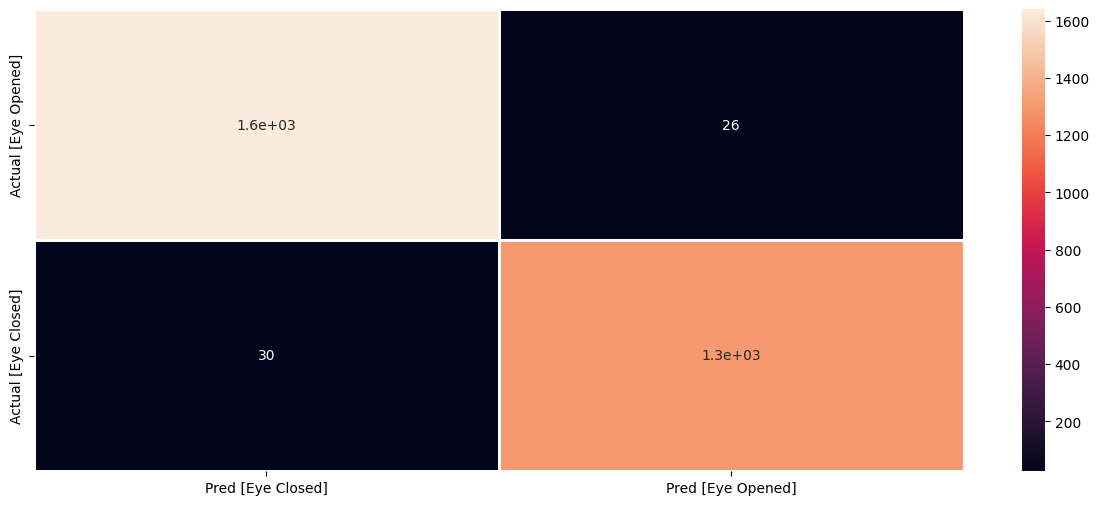

In [21]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))

ylabel = ["Actual [Eye Opened]","Actual [Eye Closed]"]
xlabel = ["Pred [Eye Closed]","Pred [Eye Opened]"]
plt.figure(figsize=(15,6))
sns.heatmap(confusion_mat, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

So here:

TN = 1656  || TP = 1274 || FN = 39 || FP = 27
This is how I interpret the confusion matrix: 0 =  Eye-Open State;  1 = Eye-Closed State

TP: Our model predicted 1274 state as Eye-Open State and in actual they were Eye-Open State (Model was correct here)

TN: Our model predicted 1656 state as Eye-Closed State and in actual they were Eye-Closed State (Model was correct here)

FP: Our model predicted 27 state as Eye-Closed State and in actual they were Eye-Open State (Model was wrong here - "Type 1 error")

FN: Our model predicted 39 state as Eye-Open State and in actual they were Eye-Closed State (Model was wrong here - "Type 2 error")



In [22]:
TP = confusion_mat[1, 1]
TN = confusion_mat[0, 0]
FP = confusion_mat[0, 1]
FN = confusion_mat[1, 0]

In [23]:

# Accuracy
print(f"Accuracy of Naive Bayes Classifier is =  {(TP+TN)/(TP+TN+FP+FN)*100} %")

# Precision
Precision = TP / ( TP + FP)
print ('Precision: ', Precision*100,'%')

# Recall
Recall = TP / ( TP + FN )
print ('Recall: ',Recall)

#f1-score
f1 = f1_score(y_test, y_pred)
print('F1-Score: ',f1)

Accuracy of Naive Bayes Classifier is =  98.13084112149532 %
Precision:  98.0392156862745 %
Recall:  0.9774436090225563
F1-Score:  0.9789156626506024


both recall and precision are high:

* True Positives: The number of correctly identified positive cases is high. our model is effectively capturing a large portion of the positive instances.
* False Positives: The number of falsely identified positive cases is relatively low. our model is making fewer incorrect positive predictions.
* True Negatives: The number of correctly identified negative cases is high. our model is effectively capturing a large portion of the negative instances.
* False Negatives: The number of falsely identified negative cases is relatively low. our model is making fewer incorrect negative predictions.

In summary, having high recall and high precision implies that our model is performing well in identifying both positive and negative cases accurately, leading to a smaller number of false predictions and a larger number of correct predictions.

In [24]:

df['eyeDetection'].value_counts()
     

eyeDetection
0    8257
1    6723
Name: count, dtype: int64

However, when dealing with imbalanced datasets, it's important to consider additional evaluation metrics such as:

* Specificity (True Negative Rate):

Specificity measures the proportion of correctly predicted negative samples out of all actual negative samples.

* Balanced Accuracy:

Balanced accuracy takes into account the imbalance in class distribution by calculating the average of sensitivity and specificity.

In [25]:

# Specificity (True Negative Rate)
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity
print ('specificity: ',specificity_score(y_test,y_pred))

# Balanced Accuracy:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print ('balanced_accuracy: ',balanced_accuracy)

specificity:  0.9843937575030012
balanced_accuracy:  0.9809186832627788


In [26]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))


INFO:tensorflow:Assets written to: C:\Users\lenovo\AppData\Local\Temp\tmpubgys8o_\assets


INFO:tensorflow:Assets written to: C:\Users\lenovo\AppData\Local\Temp\tmpubgys8o_\assets


In [79]:
#print(df[:14073])
x_test[-1]

array([[1.35028199e-02],
       [7.56459287e-01],
       [9.65610139e-02],
       [5.89455442e-04],
       [7.87779742e-01],
       [8.78033824e-03],
       [1.00374913e-02],
       [1.43783667e+00],
       [2.52279581e-02],
       [5.71930891e-01],
       [2.32738258e-01],
       [6.84049957e-01],
       [1.26348531e-02],
       [4.14011694e-04]])

In [98]:
arr = np.array([1.35028199e-02,
       7.56459287e-01,
       9.65610139e-02,
       5.89455442e-04,
       7.87779742e-01,
       8.78033824e-03,
       1.00374913e-02,
       1.43783667e+00,
       2.52279581e-02,
       5.71930891e-01,
       2.32738258e-01,
       6.84049957e-01,
       1.26348531e-02,
       4.14011694e-04])

arr = np.array(arr).reshape(-1,14,1) 
pred = model.predict(arr)
pred = np.array(pred >= 0.5, dtype = np.int64)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[0]]


----------------------

## Get a testcase for model deployment & Actuator


# Closed Eye case

In [107]:
y_test,x_test[0]

(7791     1
 7717     1
 10117    0
 4027     1
 5547     1
         ..
 13779    0
 10564    0
 14853    0
 11920    1
 14072    0
 Name: eyeDetection, Length: 2996, dtype: int64,
 array([[0.03503525],
        [1.43524487],
        [1.88139447],
        [0.0105765 ],
        [1.11845685],
        [0.00897306],
        [0.0108704 ],
        [1.86962095],
        [0.01065082],
        [1.01391014],
        [0.88439326],
        [1.49230906],
        [0.03518974],
        [0.00733689]]))

# Opened Eye case

In [109]:
y_test,x_test[-1]

(7791     1
 7717     1
 10117    0
 4027     1
 5547     1
         ..
 13779    0
 10564    0
 14853    0
 11920    1
 14072    0
 Name: eyeDetection, Length: 2996, dtype: int64,
 array([[1.35028199e-02],
        [7.56459287e-01],
        [9.65610139e-02],
        [5.89455442e-04],
        [7.87779742e-01],
        [8.78033824e-03],
        [1.00374913e-02],
        [1.43783667e+00],
        [2.52279581e-02],
        [5.71930891e-01],
        [2.32738258e-01],
        [6.84049957e-01],
        [1.26348531e-02],
        [4.14011694e-04]]))